In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars=pd.read_csv("Cars .csv")

In [3]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


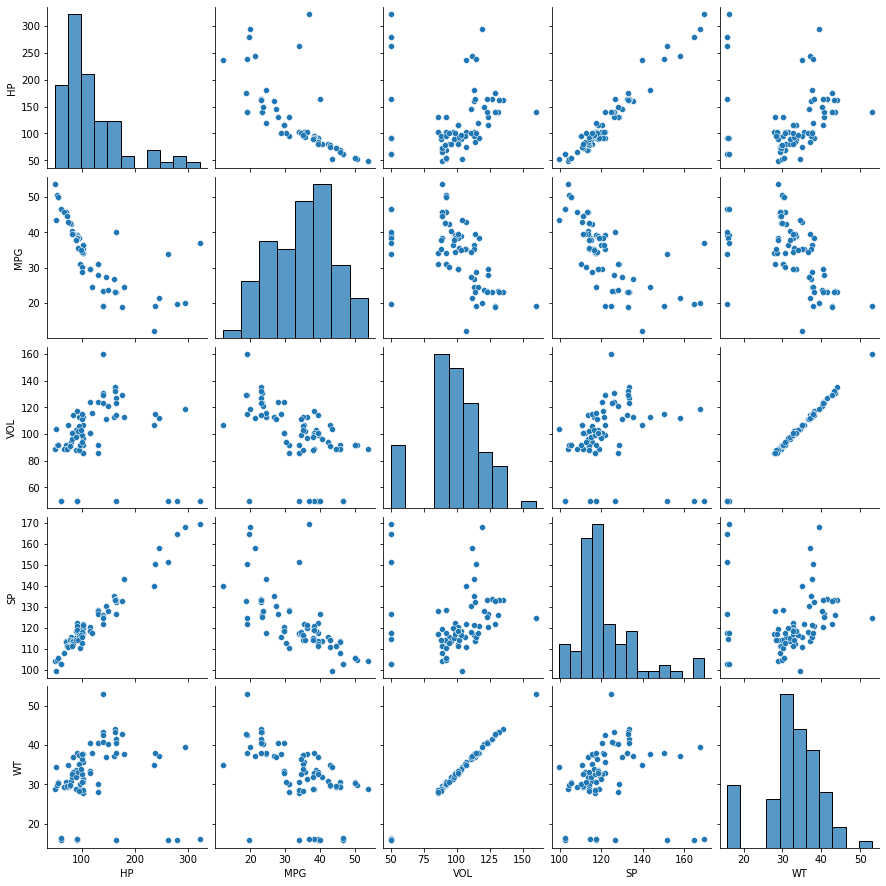

In [4]:
sns.pairplot(cars)

In [ ]:
#WT and Vol seems to be related
#sp and hp also related

In [5]:

cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
#lets build a model

In [6]:
import statsmodels.formula.api as smf

In [7]:
ml1=smf.ols("MPG~WT+VOL+SP+HP",data=cars).fit()

In [8]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           1.54e-23
Time:                        10:14:33   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#preparing model based only on volume

In [9]:
ml2=smf.ols("MPG~VOL",data=cars).fit()

In [10]:
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           3.82e-07
Time:                        10:17:43   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
ml3=smf.ols("MPG~WT+VOL",data=cars).fit()

In [12]:
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           2.43e-06
Time:                        10:19:39   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#if we have any influentiol data point?

In [13]:
import statsmodels.api as sm

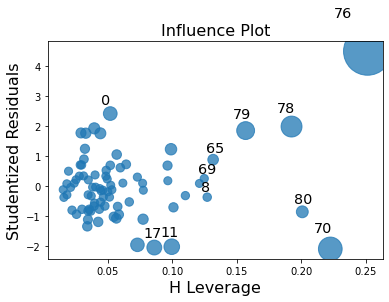

In [14]:
sm.graphics.influence_plot(ml1)
plt.show()

In [15]:
cars.iloc[75:78]

,HP,MPG,VOL,SP,WT
75,175,18.762837,129,132.864163,42.778219
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113


In [16]:
cars2=cars.drop(cars.index[[76]],axis=0)

In [17]:
cars2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [18]:
mlnew=smf.ols("MPG~WT+VOL+SP+HP",data=cars2).fit()
mlnew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     84.96
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           4.42e-27
Time:                        10:34:34   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             454.0
Df Residuals:                      75   BIC:                             465.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.8268     13.323      2.089      0.040       1.287      54.367
WT             0.0375      1.515      0.025      0.980      -2.980       3.055
VOL           -0.1855      0.509     -0.364      0.717      -1.199       0.828
SP             0.4119      0.141      2.913      0.005       0.130       0.694
HP            -0.2266      0.035     -6.413      0.000      -0.297      -0.156
==============================================================================
Omnibus:                        9.877   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.708
Skew:                           0.768   Prob(JB):                      0.00780
Kurtosis:                       3.744   Cond. No.                     5.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
rqhp=smf.ols("HP~WT+VOL+SP",data=cars2).fit().rsquared

In [23]:
vifhp=1/(1-rqhp)
vifhp

16.993671286297275

In [24]:
rqsp=smf.ols("SP~WT+VOL+HP",data=cars2).fit().rsquared

In [25]:
vifsp=1/(1-rqsp)
vifsp

17.110783389089956

In [26]:
rqwt=smf.ols("WT~HP+VOL+SP",data=cars2).fit().rsquared

In [27]:
vifwt=1/(1-rqwt)
vifwt

603.0328166852634

In [28]:
rqvol=smf.ols("VOL~WT+SP+HP",data=cars2).fit().rsquared

In [29]:
vifvol=1/(1-rqvol)
vifvol

602.7506393674782

In [30]:
ml5=smf.ols("MPG~VOL+SP+HP",data=cars2).fit()
ml5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           3.78e-28
Time:                        11:14:18   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             452.0
Df Residuals:                      76   BIC:                             461.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7555     12.922      2.148      0.035       2.018      53.493
VOL           -0.1729      0.021     -8.178      0.000      -0.215      -0.131
SP             0.4124      0.139      2.963      0.004       0.135       0.690
HP            -0.2268      0.035     -6.525      0.000      -0.296      -0.158
==============================================================================
Omnibus:                        9.859   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.686
Skew:                           0.767   Prob(JB):                      0.00788
Kurtosis:                       3.742   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
ml5pred=ml5.predict(cars2)

In [32]:
ml5pred

0     44.222122
1     42.869122
2     42.869122
3     42.766593
4     42.910283
        ...    
75    20.561966
77    15.999879
78    21.987849
79     9.544891
80    13.409222
Length: 80, dtype: float64

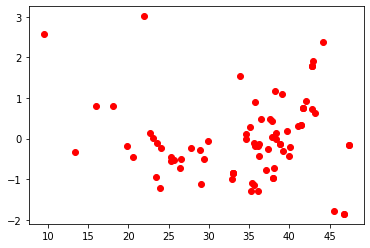

In [34]:
plt.scatter(ml5pred,ml5.resid_pearson,c='r')

(array([ 3., 10., 15., 22., 11.,  9.,  3.,  4.,  1.,  2.]),
 array([-1.8559575 , -1.36867167, -0.88138584, -0.39410002,  0.09318581,
         0.58047164,  1.06775747,  1.55504329,  2.04232912,  2.52961495,
         3.01690078]),
 <BarContainer object of 10 artists>)

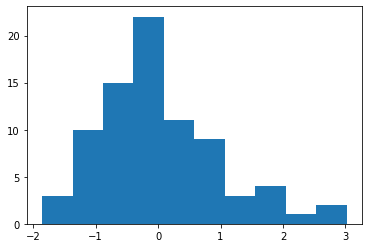

In [35]:
plt.hist(ml5.resid_pearson)

In [36]:
import pylab
import scipy.stats as st

((array([-2.38125369, -2.03479543, -1.83330035, -1.68678671, -1.5695028 ,
         -1.47053363, -1.38417871, -1.3070663 , -1.2370281 , -1.17258291,
         -1.11267145, -1.05650837, -1.0034942 , -0.95316016, -0.90513215,
         -0.85910636, -0.81483233, -0.77210076, -0.73073472, -0.69058296,
         -0.65151497, -0.61341711, -0.57618961, -0.53974416, -0.50400205,
         -0.46889262, -0.434352  , -0.40032208, -0.36674966, -0.33358569,
         -0.3007847 , -0.26830426, -0.2361045 , -0.20414775, -0.17239819,
         -0.14082151, -0.10938465, -0.07805556, -0.0468029 , -0.01559591,
          0.01559591,  0.0468029 ,  0.07805556,  0.10938465,  0.14082151,
          0.17239819,  0.20414775,  0.2361045 ,  0.26830426,  0.3007847 ,
          0.33358569,  0.36674966,  0.40032208,  0.434352  ,  0.46889262,
          0.50400205,  0.53974416,  0.57618961,  0.61341711,  0.65151497,
          0.69058296,  0.73073472,  0.77210076,  0.81483233,  0.85910636,
          0.90513215,  0.95316016,  1.

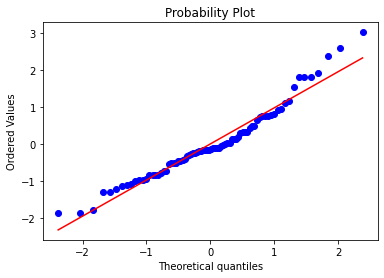

In [37]:
st.probplot(ml5.resid_pearson,dist="norm",plot=pylab)

In [38]:
resid=(cars['MPG']-ml5pred)

In [39]:
resid

0      9.478559
1      7.144280
2      7.144280
3      2.929729
4      7.593949
        ...    
76          NaN
77     3.198008
78    12.012151
79    10.288842
80    -1.307959
Length: 81, dtype: float64

In [40]:
resid.mean()

-1.729727472365994e-14